In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [4]:
data = pd.read_csv('student_reviews.csv')
data

,review_text,sentiment
0,I recently attended a concert on campus and it...,positive
1,The food in the cafeteria is really bad. I've ...,negative
2,I went to the gym on campus and it was okay. T...,neutral
3,The library is my favorite place to study on c...,positive
4,I'm really disappointed with the campus shuttl...,negative
...,...,...
94,I had a great time at the recent outdoor movie...,positive
95,"The campus parking garages are a nightmare, th...",negative
96,The campus counseling services are confidentia...,neutral
97,"I love the new student lounge on campus, it's ...",positive


### Distribution of Student Sentiment

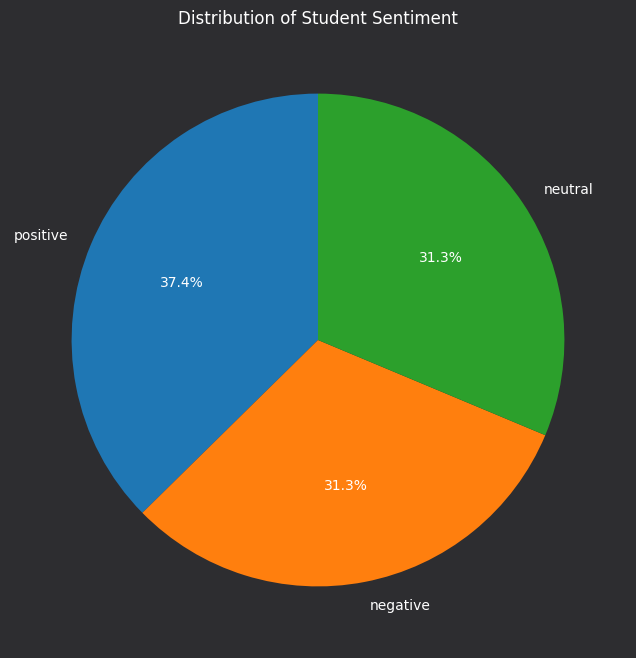

In [5]:
# Calculate sentiment counts
sentiment_counts = data['sentiment'].value_counts()

# Set figure size and face color to dark grey
plt.figure(figsize=(8, 8), facecolor="#2d2d30")
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)

# Update axes face color to match the figure
ax = plt.gca()

# Update text color for better visibility
plt.title('Distribution of Student Sentiment', color='white')
plt.setp(ax.texts, color='white')

# Display the plot
plt.show()


In [3]:
# the directory where your model is saved
model_dir = './results'

# Load the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_dir)
tokenizer = BertTokenizer.from_pretrained(model_dir)


In [10]:
def predict_sentiment(text):
    class_names = ['positive', 'neutral', 'negative']
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted label (0 or 1)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1).item()

    # Map predicted class to sentiment label

    sentiment = class_names[predicted_class]
    return sentiment


In [14]:
def predict_sentiment_from_df(df):
    df['predict'] = df['review_text'].apply(predict_sentiment)
    return df

In [19]:
test_data = pd.read_csv('./test_data.csv')
test_data = predict_sentiment_from_df(test_data)

mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
# Apply the mapping to the entire DataFrame using applymap
test_data[['sentiment', 'predict']] = test_data[['sentiment', 'predict']].applymap(mapping.get)
test_data

/tmp/ipykernel_5469/2325204884.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_data[['sentiment', 'predict']] = test_data[['sentiment', 'predict']].applymap(mapping.get)


,review_text,sentiment,predict
0,I recently attended the concert at the student...,0,0
1,The food at the cafeteria is really disappoint...,2,2
2,"The campus library is a nice place to study, i...",1,1
3,I love the new fitness classes that have been ...,0,0
4,The dorm rooms are really small and don't have...,2,2
5,"The student counseling services are available,...",1,2
6,The campus events team did an amazing job with...,0,0
7,"The parking on campus is really inconvenient, ...",2,0
8,The campus bookstore has a wide selection of t...,1,1
9,I've been really impressed with the quality of...,0,0


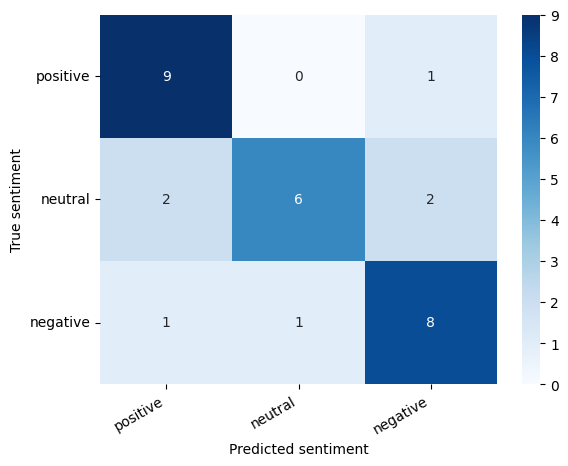

In [25]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

y_test, y_pred = test_data['sentiment'], test_data['predict']
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=mapping.keys(), columns=mapping.keys())
show_confusion_matrix(df_cm)